In [4]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [4]:
df19 = pd.read_csv(input_folder+'predictions2019_softdtw.csv')
df20 = pd.read_csv(input_folder+'predictions2020_softdtw.csv')

df19 = df19.set_index('Unnamed: 0')
df19 = df19.T
df20 = df20.set_index('Unnamed: 0')
df20 = df20.T


In [55]:
df19 = pd.read_csv('FINAL/Descriptive statistics/clusters_2019_789.csv')

In [57]:

df19 = df19.set_index('Unnamed: 0')
df19 = df19.T

In [58]:
df19 = df19.reindex(sorted(df19.columns), axis=1)
# df20 = df20.reindex(sorted(df20.columns), axis=1)

In [9]:
input_folder = 'FINAL/clustering/'
output_folder = 'FINAL/cluster_prop/'

In [59]:
survey = pd.read_csv('FINAL- Appliance stock survey and metadata 20Nov19.xlsx - FINAL- Appliance stock survey a.csv')
ques_dict = {k:[] for k in list(df19.columns)}
ques = ['q_202_gender_hh','q_203_edu_hh','q_204_edu_fem','q_209_hh_size','q_210_n_18','q_210_n_30','q_210_n_45','q_210_n_60','q_210_n_90','q_222_income_group']
for m in list(df19.columns):
    for q in ques:
        ques_dict[m].append(survey.loc[survey['home_no']==m][q].values[0])
        


In [60]:
ques_df = pd.DataFrame(ques_dict)

In [61]:
ques_df.index = ['gender','edu','f_edu','num_people','n_18','n_30','n_45','n_60','n_90','salary']

In [63]:
ques_df.to_csv('FINAL/Descriptive statistics/survey_with_clusters.csv')

In [49]:
ques_df = ques_df.set_index('Unnamed: 0')

In [ ]:
# Average salary of Bareilly and Mathura 

In [62]:
ques_df

,BR06,BR07,BR08,BR12,BR18,BR23,BR24,BR31,BR38,BR45,...,MH18,MH21,MH22,MH23,MH24,MH27,MH33,MH36,MH43,MH45
gender,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
edu,7,7,7,5,5,5,4,5,7,7,...,7,7,5,7,7,5,7,5,5,7
f_edu,7,7,7,7,7,4,7,1,7,7,...,7,5,7,7,7,5,7,5,7,7
num_people,2,3,4,5,10,5,8,4,6,4,...,4,4,4,2,4,9,4,5,4,8
n_18,0,1,0,2,4,3,3,0,0,2,...,2,2,0,0,1,2,1,1,1,1
n_30,0,0,2,0,4,0,1,0,3,0,...,2,0,2,0,2,5,2,2,1,1
n_45,0,0,0,2,0,2,3,2,2,2,...,0,2,0,0,1,0,0,0,2,3
n_60,0,0,2,1,2,0,1,2,0,0,...,0,0,0,2,0,2,1,2,0,2
n_90,2,2,0,0,0,0,0,0,1,0,...,0,0,2,0,0,0,0,0,0,1
salary,5,8,6,7,4,4,4,3,4,4,...,6,4,8,4,4,7,3,3,5,10


In [31]:
df19 = df19.T
df20 = df20.T

In [37]:
cl = [0,1,2,3]

for c in cl:
    print(list(df19.loc[df19['cluster']==c].index))

['MH36', 'MH22', 'MH45', 'MH02', 'MH10', 'MH21']
['MH18', 'BR51', 'BR06', 'BR11', 'BR22']
['MH43', 'MH14', 'BR24', 'BR31', 'BR38', 'BR45', 'BR07', 'BR12', 'BR18', 'BR23']
['MH24', 'MH27', 'MH33', 'MH23', 'MH07', 'BR08']


In [34]:
ques_df['cluster_19'] = list(df19.iloc[-1])
ques_df['cluster_20'] = list(df20.iloc[-1])

In [32]:
ques_df = ques_df.T

In [75]:
from statsmodels.multivariate.manova import MANOVA 

In [9]:
ques_df = pd.read_csv('FINAL/Descriptive statistics/survey_with_clusters.csv')

In [10]:
ques_df

,Unnamed: 0,gender,edu,f_edu,num_people,n_18,n_30,n_45,n_60,n_90,salary,cluster,Date around which sustained AC usage began
0,BR06,Female,Grad/PG,Grad/PG,2,0,0,0,0,2,35000,two,20-06-2020
1,BR07,Male,Grad/PG,Grad/PG,3,1,0,0,0,2,87500,three,19-05-2020
2,BR08,Male,Grad/PG,Grad/PG,4,0,2,0,2,0,45000,four,04-06-2020
3,BR12,Male,10th-12th,Grad/PG,5,2,0,2,1,0,62500,one,14-04-2020
4,BR18,Male,10th-12th,Grad/PG,10,4,4,0,2,0,25000,three,04-06-2020
5,BR23,Male,10th-12th,10th-12th,5,3,0,2,0,0,25000,three,24-05-2020
6,BR24,Female,10th-12th,Grad/PG,8,3,1,3,1,0,25000,one,24-05-2020
7,BR31,Male,10th-12th,Illiterate,4,0,0,2,2,0,15000,one,29-05-2020
8,BR38,Male,Grad/PG,Grad/PG,6,0,3,2,0,1,25000,three,16-04-2020
9,BR45,Male,Grad/PG,Grad/PG,4,2,0,2,0,0,25000,one,17-05-2020


In [68]:

ques_df = ques_df.set_index('Unnamed: 0')


In [70]:
ques_df = ques_df.T

In [13]:
df = df.T

In [97]:
df = pd.read_csv('FINAL/final1/clustering/socioeco_var_copy.csv',index_col=0)

In [98]:
from dython import nominal


In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

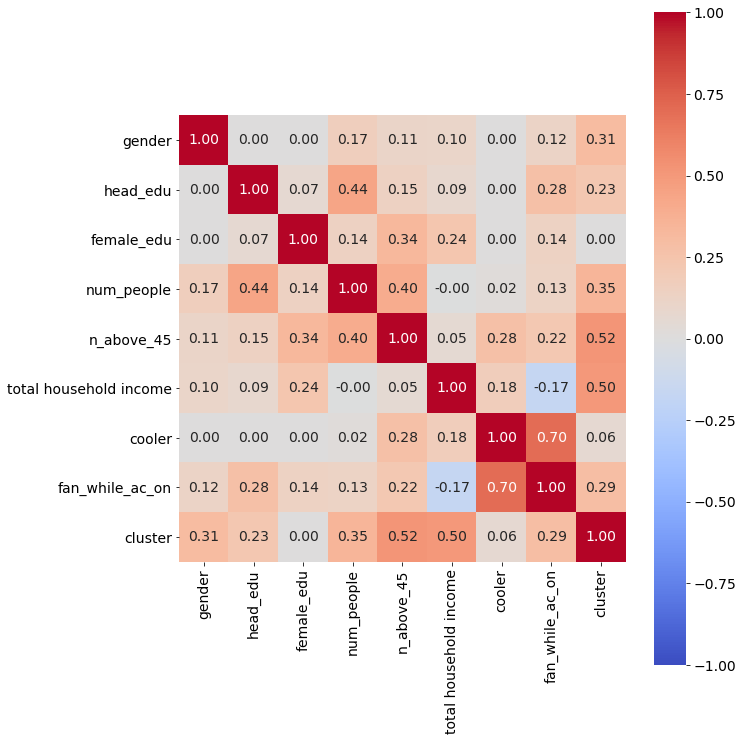

In [114]:
corr = nominal.associations(df,figsize=(10,12),mark_columns=False,cmap='coolwarm');

In [68]:
fig['ax']

In [115]:
corr['ax'].figure.savefig('FINAL/final1/clustering/plots/corr_map.png',dpi=300,bbox_inches='tight')

In [78]:
plt.rcParams.update({'font.size': 14})

In [24]:
pearsoncorr

,num_people,n_above_45,salary
num_people,1.000000,0.399084,-0.004816
n_above_45,0.399084,1.000000,0.054930
salary,-0.004816,0.054930,1.000000


In [102]:
e = df.groupby('cluster').mean()

In [103]:
e = e.T

In [107]:
e = pd.read_csv('FINAL/final1/clustering/summary_statistic.csv',index_col=0)

In [58]:
y = LabelBinarizer().fit_transform(df.gender)

In [109]:
e = e.iloc[:-1]

In [111]:
e = np.round(e,2)

In [112]:
e

,C1,C2,C3
num_people,5.58,3.75,4.62
n_above_45,2.83,1.50,1.75
total household income,48125.00,27500.00,27500.00
